In [1]:
#Need to make better reader of all in the file. i.e better than code1
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten

from keras.layers import Conv2D

#from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt



array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [60]:
# for i in range(0,5000):
#     if y_train[i].argmax() == 1:
#         plt.imshow(X_train[i], cmap="gray")
#         plt.show()
# y_train[3].argmax()

In [61]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
# One-hot Encoding -
# For example, if the image is of the number 6, 
# then the label instead of being = 6, it will have a value 1 in column 7 and 0 in rest of the columns, like [0,0,0,0,0,0,1,0,0].
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
from keras.layers import MaxPooling2D, Dropout
## Declare the model
model = Sequential()

# ## Declare the layers
# layer_1 = Conv2D(32, kernel_size=3, activation="relu", input_shape=(28, 28, 1))
# layer_2 = Conv2D(64, kernel_size=3, activation="relu")
# layer_3 = Flatten()
# layer_4 = Dense(10, activation="softmax")
# layer_maxpool = MaxPooling2D(pool_size=(2, 2))

# ## Add the layers to the model
# model.add(layer_1)
# model.add(layer_2)
# model.add(layer_3)
# model.add(layer_4)

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4048 - accuracy: 0.8885 - val_loss: 0.0570 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1232 - accuracy: 0.9652 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0928 - accuracy: 0.9735 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0854 - accuracy: 0.9757 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0731 - accuracy: 0.9790 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0688 - accuracy: 0.9812 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0612 - accuracy: 0.9829 - val_loss: 0.0233 -

1/1 [==============================] - 0s 36ms/step
Prediction (Softmax) from the neural network:

 [[1.7570511e-15 3.4327406e-14 1.0000000e+00 5.0613352e-10 1.1205415e-14
  1.9447288e-16 5.6674805e-16 1.2874669e-10 5.0960600e-11 3.1363352e-15]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




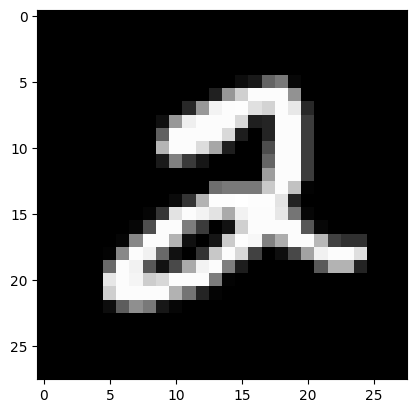



Final Output: 2


In [179]:
example = X_train[5]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [754]:
from PIL import Image
#imagesource = cv2.imread('new2.png')
imagesource = 'new2.png' # add location of file
img = Image.open(imagesource)

In [755]:
# TO FIND FROM ACC NO - INPUT 1

left = 91
top = 0
right = 360
bottom = 42
image = img.crop((left, top, right, bottom))
image = np.array(image)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []


dup_img = image.copy()
def ret_x_centroid(contours):
    if cv2.contourArea(contours) > 10:
        cent_moment = cv2.moments(contours)
        return (int(cent_moment["m10"]/cent_moment["m00"]))
    else:
        pass
        
def identity_centroid(image,centroid):
    cent_moment = cv2.moments(centroid)
    centroid_x = int(cent_moment["m10"]/cent_moment["m00"])
    centroid_y = int(cent_moment["m01"]/cent_moment["m00"])
    cv2.circle(image,(centroid_x,centroid_y),10,(255,0,0),-1)
    return image

contours_from_l_to_r = sorted(contours,key = ret_x_centroid,reverse = False)

for(i,c) in enumerate(contours_from_l_to_r):
    cv2.drawContours(dup_img,[c],-1,(0,0,255),3)
    cent_moment = cv2.moments(c)
    centroid_x = int(cent_moment["m10"]/cent_moment["m00"])
    centroid_y = int(cent_moment["m01"]/cent_moment["m00"])
    x,y,w,h = cv2.boundingRect(c)

    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=1)
        
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]    
        
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)





----------------Contoured Image--------------------


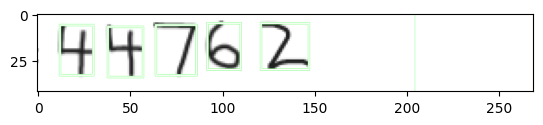

In [756]:
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp1 = np.array(preprocessed_digits)
inp2 = np.array(resized_digit)


In [757]:
FromAcc = []

for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    #print ("\n\n---------------------------------------\n\n")
    #print ("=========PREDICTION============ \n\n")
    #plt.imshow(digit.reshape(28, 28), cmap="gray")
    #plt.show()
    #print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    FromAcc.append(np.argmax(prediction))
    # min_val = np.min(prediction)
    # max_val = np.max(prediction)
    # normalized_arr = (prediction - min_val) / (max_val - min_val)
    # print(normalized_arr)
    #print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    #print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    #print ("\n\n---------------------------------------\n\n")

1/1 [==============================] - 0s 44ms/step


In [758]:
#print(FromAcc)
del FromAcc[-1]
FromAcc = ''.join(map(str, FromAcc))
FromAcc = int(FromAcc)
print(FromAcc)

44762


In [759]:
#Simillary do it for 2 more as save it as From_AC and Amount
# TO FIND TO ACC NO - INPUT 2
img = Image.open(imagesource)
left = 65
top = 43
right = 360
bottom = 77
image = img.crop((left, top, right, bottom))
image = np.array(image)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []


dup_img = image.copy()
def ret_x_centroid(contours):
    if cv2.contourArea(contours) > 10:
        cent_moment = cv2.moments(contours)
        return (int(cent_moment["m10"]/cent_moment["m00"]))
    else:
        pass
        
def identity_centroid(image,centroid):
    cent_moment = cv2.moments(centroid)
    centroid_x = int(cent_moment["m10"]/cent_moment["m00"])
    centroid_y = int(cent_moment["m01"]/cent_moment["m00"])
    cv2.circle(image,(centroid_x,centroid_y),10,(255,0,0),-1)
    return image

contours_from_l_to_r = sorted(contours,key = ret_x_centroid,reverse = False)

for(i,c) in enumerate(contours_from_l_to_r):
    cv2.drawContours(dup_img,[c],-1,(0,0,255),3)
    cent_moment = cv2.moments(c)
    centroid_x = int(cent_moment["m10"]/cent_moment["m00"])
    centroid_y = int(cent_moment["m01"]/cent_moment["m00"])
    x,y,w,h = cv2.boundingRect(c)

    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=1)
        
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]    
        
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)




----------------Contoured Image--------------------


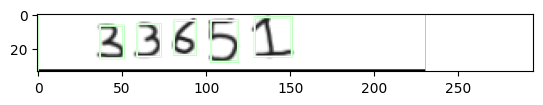

In [760]:
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp1 = np.array(preprocessed_digits)
inp2 = np.array(resized_digit)

In [761]:
ToAcc = []

for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    #print ("\n\n---------------------------------------\n\n")
    #print ("=========PREDICTION============ \n\n")
    #plt.imshow(digit.reshape(28, 28), cmap="gray")
    #plt.show()
    #print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    ToAcc.append(np.argmax(prediction))
    # min_val = np.min(prediction)
    # max_val = np.max(prediction)
    # normalized_arr = (prediction - min_val) / (max_val - min_val)
    # print(normalized_arr)
    #print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    #print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    #print ("\n\n---------------------------------------\n\n")

del ToAcc[-1]
ToAcc = ''.join(map(str, ToAcc))
ToAcc = int(ToAcc)

1/1 [==============================] - 0s 56ms/step


In [762]:
#Simillary do it for 2 more as save it as From_AC and Amount
# TO FIND Amount - INPUT 3

left = 83
top = 76
right = 360
bottom = 200
image = img.crop((left, top, right, bottom))
image = np.array(image)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []


dup_img = image.copy()
def ret_x_centroid(contours):
    if cv2.contourArea(contours) > 10:
        cent_moment = cv2.moments(contours)
        return (int(cent_moment["m10"]/cent_moment["m00"]))
    else:
        pass
        
def identity_centroid(image,centroid):
    cent_moment = cv2.moments(centroid)
    centroid_x = int(cent_moment["m10"]/cent_moment["m00"])
    centroid_y = int(cent_moment["m01"]/cent_moment["m00"])
    cv2.circle(image,(centroid_x,centroid_y),10,(255,0,0),-1)
    return image

contours_from_l_to_r = sorted(contours,key = ret_x_centroid,reverse = False)

for(i,c) in enumerate(contours_from_l_to_r):
    cv2.drawContours(dup_img,[c],-1,(0,0,255),3)
    cent_moment = cv2.moments(c)
    centroid_x = int(cent_moment["m10"]/cent_moment["m00"])
    centroid_y = int(cent_moment["m01"]/cent_moment["m00"])
    x,y,w,h = cv2.boundingRect(c)

    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=1)
        
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]    
        
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

In [763]:
Amount = []

for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    #print ("\n\n---------------------------------------\n\n")
    #print ("=========PREDICTION============ \n\n")
    #plt.imshow(digit.reshape(28, 28), cmap="gray")
    #plt.show()
    #print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    Amount.append(np.argmax(prediction))
    # min_val = np.min(prediction)
    # max_val = np.max(prediction)
    # normalized_arr = (prediction - min_val) / (max_val - min_val)
    # print(normalized_arr)
    #print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    #print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    #print ("\n\n---------------------------------------\n\n")

#print(Amount)
del Amount[-1]

Amount = ''.join(map(str, Amount))
Amount = int(Amount)
Amount

1/1 [==============================] - 0s 37ms/step


70000

In [765]:
#Now add transaction to transaction .csv
import pandas as pd
transaction = pd.read_csv("Transaction.csv")
name = pd.read_csv("AccName.csv")



In [769]:
def get_name(accno):
    accfilter = name["Account Number"] == accno
    return(name[accfilter]["User Name"].values[0])

In [770]:
df1 = transaction[(transaction["AC_No_dest"] == 44762 ) | (transaction["AC_No_origin"] == 44762)]
#print(df1)
x = len(df1)
lastrow = df1.tail(1)
print(lastrow["new_balance_dest"].values[0])

2,40,000


In [771]:
def get_balance(accno):
    #print(accno)
    
    df = transaction[(transaction["AC_No_dest"] == accno ) | (transaction["AC_No_origin"] == accno)]
    lastrow = df.tail(1)
    #print(lastrow["AC_No_dest"])
    if lastrow["AC_No_dest"].values == accno :
        balance = lastrow["new_balance_dest"].values[0]
    else:
        balance = lastrow["new_balance_origin"].values[0]

    return balance

In [772]:
import warnings
import sys

In [774]:

def update_transactions(FromAcc,ToAcc,Amount):
    if FromAcc not in name["Account Number"].tolist():
        warnings.warn("User Details Invalid, please check manually")
        sys.exit(2)

    if ToAcc not in name["Account Number"].tolist(): 
        warnings.warn("User Details Invalid, please check manually")
        sys.exit(2)
    
    Name_origin = get_name(FromAcc)
    #print(Name_origin)
    Name_dest = get_name(ToAcc)
    Old_balance_origin = get_balance(FromAcc)
    Old_balance_dest = get_balance(ToAcc)
    
    Old_balance_origin = Old_balance_origin.replace(",","")
    Old_balance_dest = Old_balance_dest.replace(",","")
    #print(Old_balance_origin,Old_balance_dest)
    Old_balance_dest = int(Old_balance_dest)
    Old_balance_origin = int(Old_balance_origin)
    new_balance_origin = Old_balance_origin - Amount
    new_balance_dest = Old_balance_dest + Amount
    if new_balance_origin < 0:
        warnings.warn("The cheque will get bounced due to insufficient balance") 
        sys.exit(1)   
        
    newrow = {'AC_No_origin': FromAcc , 'Name_origin': Name_origin, 'Old_balance_origin': Old_balance_origin,
              'new_balance_origin': new_balance_origin, 'AC_No_dest': ToAcc, 'Name_dest': Name_dest, 'Old_balance_dest': Old_balance_dest,
              'new_balance_dest': new_balance_dest, 'Amount': Amount}
    return(newrow)
    # print(newrow)
    # indexnumber = len(transaction)
    # dftoadd = pd.DataFrame(newrow,index= [indexnumber])

    # print("Newrow created")
    # transaction.append(dftoadd)

    # #transaction.append(newrow,ignore_index=True)
    # #print(transaction)
    # print("newrow appended")

In [775]:
newrow = update_transactions(FromAcc,ToAcc,Amount)

In [776]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AC_No_origin        47 non-null     int64 
 1   Name_origin         47 non-null     object
 2   Old_balance_origin  47 non-null     object
 3   new_balance_origin  47 non-null     object
 4   AC_No_dest          47 non-null     int64 
 5   Name_dest           47 non-null     object
 6   Old_balance_dest    47 non-null     object
 7   new_balance_dest    47 non-null     object
 8   Amount              47 non-null     object
dtypes: int64(2), object(7)
memory usage: 3.4+ KB


In [777]:
#print(newrow)
indexnumber = len(transaction)
dftoadd = pd.DataFrame(newrow,index= [indexnumber])
#print(dftoadd)
#print("Newrow created")
#transaction.append(dftoadd)
transaction = pd.concat([transaction,dftoadd],ignore_index=True)
#transaction.append(newrow,ignore_index=True)
#print(transaction)

print("newrow appended")

newrow appended


In [780]:
csv_file_path = "Transaction.csv"
transaction.to_csv(csv_file_path,mode="w",index=False)